# Dune Grid Interface exercise

In this exercise, we will explore the Grid API by iterating over a grid, calculating some quantities and integrating a function.

In [1]:
#include<dune/jupyter.hh>

After including all the necessary headers through above convenience header, the first step is to instantiate a grid. In this example, we use `YaspGrid<2>`, a two-dimensional, structured, equidistant grid that is shipped with `dune-grid`. However, the code below stays exactly the same when switching to a different grid implementation. This is the biggest strength of the generic Grid API provided by Dune. 

In [3]:
static const int dim = 2;
using Grid = Dune::YaspGrid<dim>;

// define the extensions of the domain: a unit square with N by N cells
Dune::FieldVector<double,dim> lowerleft(0.0);
Dune::FieldVector<double,dim> upperright(1.0);
auto N  = Dune::filledArray<dim, unsigned int>(4);

// build a structured grid
auto grid = Dune::StructuredGridFactory<Grid>::createCubeGrid(lowerleft, upperright, N);

The above code has created a 4x4 grid for the unit square. We will next have a look at a visualization of the grid, as well as some useful information about local and global indices etc. You can change the size of the grid above and rerun this visualization.

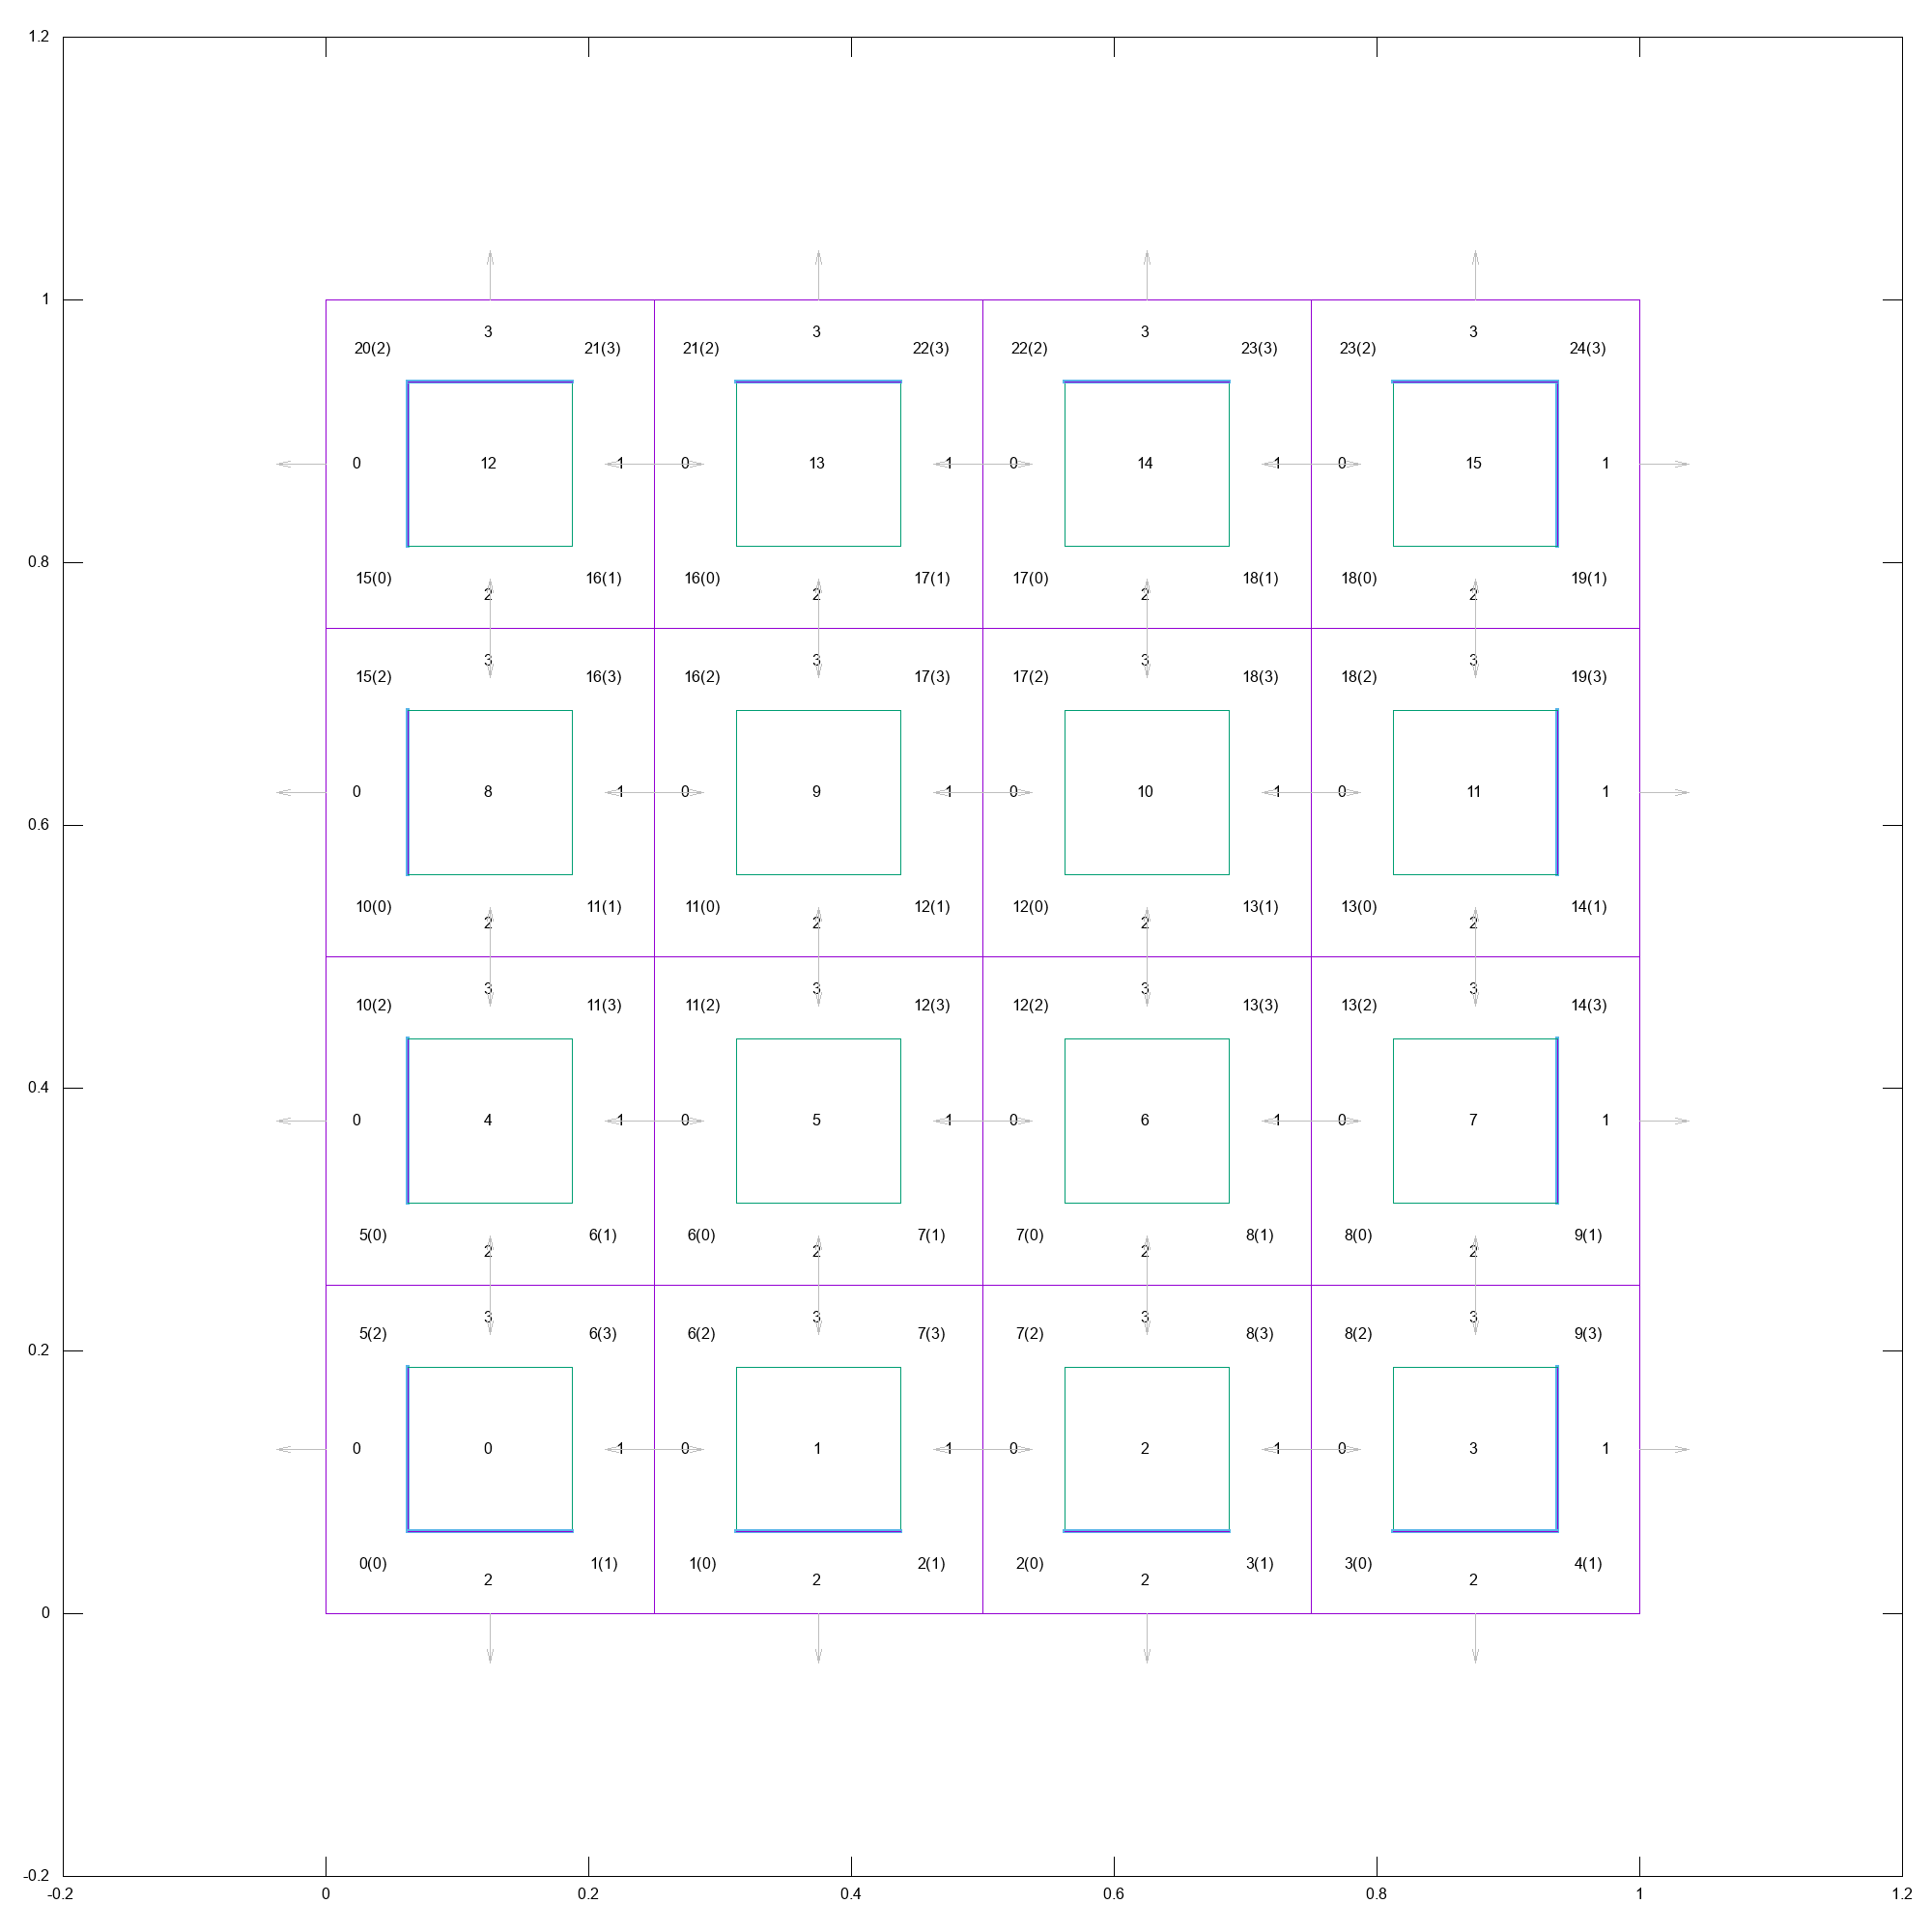

In [4]:
grid

Remember from the lecture: Algorithms in Dune do not operate directly on the grid data structure, instead they operate on a *grid view* object. We use a *leaf view* here, which only exposes the leaf entities of the hierarchical grid object, but *level views* would be possible as well.

In [5]:
auto gridview = grid->leafGridView();

## Exercise 1: Iterating over a grid

In this first exercise, we will iterate over the grid elements and intersections and print some information. Feel free to do the following tasks or to explore other aspects of the Grid API that you are interested in. You might want to have a look at [the class documentation of the Geometry object](https://dune-project.org/doxygen/pdelab/master/classDune_1_1Geometry.html) while doing this (Inline documentation in Jupyter is on the TODO list, but there are some technical obstacles).

*Task 1*: Calculate the center of each cell by summing up all corner vectors and dividing by the number of corners. Print the results. Also print the center as returned by `center() 
` method of the geometry.

In [5]:
for (const auto& e : elements(gridview))
{
    auto geo = e.geometry();

    // Fill your code here
}

*Task 2*: Iterate over all the intersections in the grid and output the corner and center coordinates of each intersection (the methods corner and center return global coordinates)

In [ ]:
for (const auto& e : elements(gridview))
{
    for (const auto& is : intersections(gridview, e))
    {
        auto fgeo = is.geometry();
        auto fgt = fgeo.type();
        auto fgeo_self = is.geometryInInside();

        // Fill your code here
    }
}

*Task 3*: Iterate over all the interior intersections in the grid
and output its center in terms of
* global coordinates with respect to the domain origin
* coordinates with respect to the current element
* coordinates with respect to the neighboring element

In [ ]:
for (const auto& e : elements(gridview))
{
    for (const auto& is : intersections(gridview, e))
    {
        auto fgeo = is.geometry();
        auto fgt = fgeo.type();
        auto fgeo_self = is.geometryInInside();

        if(is.neighbor())
        {
            // Fill your code here
        }
    }
}

*Task 4*: Iterate over all boundary intersections in the grid and output the coordinates of their center w.r.t. the owning element.

In [ ]:
for (const auto& e : elements(gridview))
{
    for (const auto& is : intersections(gridview, e))
    {
        auto fgeo = is.geometry();
        auto fgt = fgeo.type();
        auto fgeo_self = is.geometryInInside();

        if(is.boundary())
        {
            // Fill your code here
        }
    }
}

## Exercise 2: Integrating a function

Integrating functions over the domain $\Omega$ is a very common task when implementing finite elements. We will now perform the integration of a function $f(x)$ manually. We first define the function to integrate - feel free to change it later on and rerun the integration code:

In [6]:
double f(Dune::FieldVector<double, 2> x)
{
    return std::exp(x[0]) * std::exp(x[1]);
}

It is now your task to integrate $f(x)$ using a numerical quadrature formula on the reference element:

$$
\int_\Omega f(x)dx = \sum_{T\in\mathcal{T}_h}\int_Tf(x)dx = \sum_{T\in\mathcal{T}_h}\int_\hat{T}f(\mu_T(\hat{x}))|\det B_T|dx \approx \sum_{T\in\mathcal{T}_h}\sum_{i}\hat{\omega}_if(\hat{x}_i)
$$

Dune provides such quadrature formula for all common reference elements and a large amount of degrees. We are using the quadrature formulae through PDELab here, as this will be the way that we will be accessing qudarature formulae for the rest of the course. The `qp` object represents a quadrature point and has methods `weight()` and `position()`.

In [7]:
double integral = 0.0;
for (const auto& e : elements(gridview))
{
    auto geo = e.geometry();
    auto rule = Dune::PDELab::quadratureRule(geo, 3);
    for (const auto & qp : rule)
    {
        // Fill your code here
    }
}
std::cout << "Integrating f over Omega: " << integral << std::endl;

IncrementalExecutor::executeFunction: symbol '__emutls_v._ZSt11__once_call' unresolved while linking [cling interface function]!
IncrementalExecutor::executeFunction: symbol '__emutls_v._ZSt15__once_callable' unresolved while linking [cling interface function]!


Interpreter Error: 